#### 1. Design Effectiveness

Randomization

Objective: Ensure that clients were randomly assigned to either the Test or Control group to eliminate biases.

In [3]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# impprt the dataset

df_merged = pd.read_csv('/Users/alexandreribeiro/Desktop/Ironhacks Booty/5th week/Project/Datasets/clean/df_merged_final.csv')

df_merged.sample(5)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accts,balance,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
198301,7377214,14,176,62,F,2,46421.97,2,5,Control,60393775_40580877504,731288458_77728869654_90011,step_2,2017-05-31 10:51:58
205384,9828910,15,190,40,M,3,143513.01,5,8,Test,687634557_2545627335,890706535_3619516159_860496,start,2017-04-14 15:25:58
215275,4357556,11,143,66,M,3,36669.69,4,7,Test,187182113_94249082193,598810158_15994112206_772131,confirm,2017-04-22 13:54:54
161516,7313419,17,210,59,M,2,345848.96,1,4,Control,437836262_65213978965,692901419_21320284791_708681,step_1,2017-03-29 14:56:18
114634,8524876,26,323,47,F,3,75393.33,6,9,Control,784066612_11379808111,435899213_85188579679_618021,confirm,2017-04-20 00:53:37


In [3]:
from scipy.stats import ttest_ind, chi2_contingency

# Prepare the dataset for analysis
df_merged['date_time'] = pd.to_datetime(df_merged['date_time'])

# Check the distribution of key variables between the Test and Control groups
test_group_merged = df_merged[df_merged['variation'] == 'Test']
control_group_merged = df_merged[df_merged['variation'] == 'Control']

# Summary statistics for key variables in the merged dataset
summary_test_merged = test_group_merged.describe(include='all')
summary_control_merged = control_group_merged.describe(include='all')

# Display summary statistics
print("Test Group Summary Statistics (Merged Dataset):")
print(summary_test_merged)
print("\nControl Group Summary Statistics (Merged Dataset):")
print(summary_control_merged)

# Statistical tests for equivalence in the merged dataset
# Continuous variables (e.g., balance, age, tenure) in the merged dataset
continuous_vars_merged = ['balance', 'clnt_age', 'clnt_tenure_yr', 'clnt_tenure_mnth']
t_tests_merged = {var: ttest_ind(test_group_merged[var], control_group_merged[var]) for var in continuous_vars_merged}

# Categorical variables (e.g., gender) in the merged dataset
categorical_vars_merged = ['gender']
chi2_tests_merged = {var: chi2_contingency(pd.crosstab(df_merged[var], df_merged['variation'])) for var in categorical_vars_merged}

print("\nT-Tests for Continuous Variables:")
print(t_tests_merged)
print("\nChi2 Tests for Categorical Variables:")
print(chi2_tests_merged)

Test Group Summary Statistics (Merged Dataset):
           client_id  clnt_tenure_yr  clnt_tenure_mnth       clnt_age  gender  \
count   1.766410e+05   176641.000000     176641.000000  176641.000000  176641   
unique           NaN             NaN               NaN            NaN       3   
top              NaN             NaN               NaN            NaN       M   
freq             NaN             NaN               NaN            NaN   59288   
mean    5.007069e+06       12.182025        152.227410      48.419512     NaN   
min     5.550000e+02        2.000000         33.000000      17.000000     NaN   
25%     2.508516e+06        6.000000         82.000000      35.000000     NaN   
50%     5.061874e+06       11.000000        138.000000      50.000000     NaN   
75%     7.475920e+06       16.000000        193.000000      61.000000     NaN   
max     9.999832e+06       55.000000        669.000000      96.000000     NaN   
std     2.879062e+06        6.940522         82.955476      1

In [4]:
# Verify implementation consistency in the merged dataset
implementation_check_merged = df_merged.groupby('client_id')['variation'].nunique()
inconsistent_implementation_merged = implementation_check_merged[implementation_check_merged > 1]

# Display inconsistent implementations if any
print("Inconsistent Implementations (if any):")
print(inconsistent_implementation_merged)

Inconsistent Implementations (if any):
Series([], Name: variation, dtype: int64)


In [5]:
# Check the time frame coverage in the merged dataset
date_coverage_merged = df_merged['date_time'].agg(['min', 'max'])

# Analyze the distribution of interactions over time in the merged dataset
interaction_distribution_merged = df_merged['date_time'].value_counts().sort_index()

print("Interaction Distribution Over Time (Merged Dataset):")
print(interaction_distribution_merged)

# Display date coverage
print("\nDate Coverage (Merged Dataset):")
print(date_coverage_merged)

Interaction Distribution Over Time (Merged Dataset):
date_time
2017-03-15 00:19:28    1
2017-03-15 00:20:50    1
2017-03-15 00:22:52    1
2017-03-15 00:23:47    1
2017-03-15 00:26:24    1
                      ..
2017-06-20 23:21:41    1
2017-06-20 23:26:00    1
2017-06-20 23:56:17    1
2017-06-20 23:56:30    1
2017-06-20 23:57:06    1
Name: count, Length: 283253, dtype: int64

Date Coverage (Merged Dataset):
min   2017-03-15 00:19:28
max   2017-06-20 23:57:06
Name: date_time, dtype: datetime64[ns]


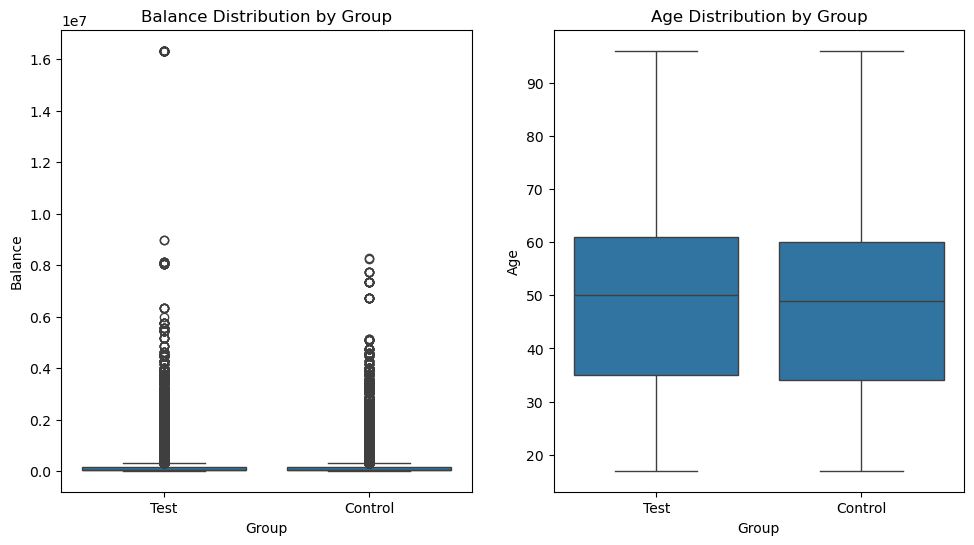

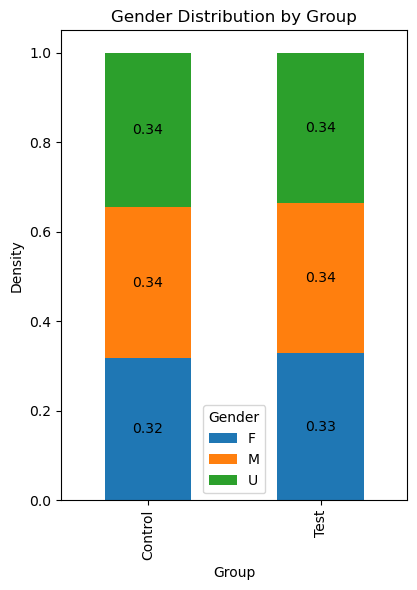

Mean Balance (Test Group): 162323.09
Mean Balance (Control Group): 158890.55
Mean Age (Test Group): 48.4
Mean Age (Control Group): 48.0


In [25]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Box Plot for Balance
plt.subplot(1, 3, 1)
sns.boxplot(x='variation', y='balance', data=df_merged)
plt.title('Balance Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Balance')

# Box Plot for Age
plt.subplot(1, 3, 2)
sns.boxplot(x='variation', y='clnt_age', data=df_merged)
plt.title('Age Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Age')

plt.figure(figsize=(12, 6))

# Density Plot for Gender Distribution
plt.subplot(1, 3, 3)
gender_counts = df_merged.groupby(['variation', 'gender']).size().unstack().fillna(0)
gender_counts = gender_counts.divide(gender_counts.sum(axis=1), axis=0)  # Normalize to density
ax = gender_counts.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Gender Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Density')
plt.legend(title='Gender')

# Annotate bars with values
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()
plt.show()


# Display mean values for Balance and Age
mean_balance_test = df_merged[df_merged['variation'] == 'Test']['balance'].mean().round(2)
mean_balance_control = df_merged[df_merged['variation'] == 'Control']['balance'].mean().round(2)
mean_age_test = df_merged[df_merged['variation'] == 'Test']['clnt_age'].mean().round(1)
mean_age_control = df_merged[df_merged['variation'] == 'Control']['clnt_age'].mean().round(1)

print(f"Mean Balance (Test Group): {mean_balance_test}")
print(f"Mean Balance (Control Group): {mean_balance_control}")
print(f"Mean Age (Test Group): {mean_age_test}")
print(f"Mean Age (Control Group): {mean_age_control}")

### Randomization and Equivalence:

#### **Summary Statistics:**

Test Group:

- Number of Clients: 176,641
- Average Tenure (Years): 12.18
- Average Age: 48.42
- Average Balance: $162,323.10
- Gender Distribution: 59,288 (M), 48,438 (U)

Control Group:

- Number of Clients: 140,482
- Average Tenure (Years): 12.17
- Average Age: 48.01
- Average Balance: $158,890.50
- Gender Distribution: 45,538 (M), 48,438 (U)

#### **Statistical Tests:**

Balance:

- P-value: 0.00485 (Statistically significant difference)

Age:

- P-value: 2.13e-13 (Statistically significant difference)

Tenure (Years):

- P-value: 0.567 (No significant difference)

Tenure (Months):

- P-value: 0.456 (No significant difference)

- Gender:

P-value: 9.70e-13 (Statistically significant difference)


### 2. Duration

Time Frame

- Objective: Ensure that the experiment duration (from 3/15/2017 to 6/20/2017) is adequate to gather meaningful data.

In [30]:
# Ensure the date column is in datetime format
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Filter for 'confirm' step
confirm_control = df_merged[(df_merged['process_step'] == 'confirm') & (df_merged['variation'] == 'Control')]
confirm_test = df_merged[(df_merged['process_step'] == 'confirm') & (df_merged['variation'] == 'Test')]

# Calculate unique visits
unique_control_visits = df_merged[df_merged['variation'] == 'Control']['visit_id'].nunique()
unique_test_visits = df_merged[df_merged['variation'] == 'Test']['visit_id'].nunique()

# Calculate the completion rate for both Test and Control groups
completion_rate_control = confirm_control['visit_id'].nunique() / unique_control_visits
completion_rate_test = confirm_test['visit_id'].nunique() / unique_test_visits

# Print the completion rate in percentage rounded to 1 decimal place
print('Completion rate by variation:')
print('Control:', round(completion_rate_control * 100, 1), '%')
print('Test:', round(completion_rate_test * 100, 1), '%')

Completion rate by variation:
Control: 49.8 %
Test: 58.5 %


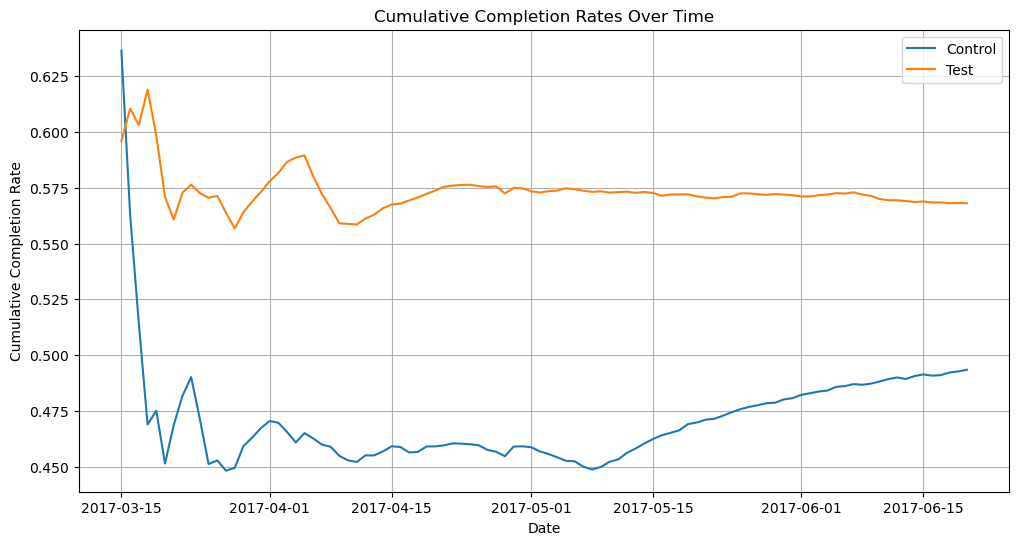

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure the date column is in datetime format
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Create a new column 'completed' based on 'process_step' being 'confirm'
df_merged['completed'] = df_merged['process_step'] == 'confirm'

# Group by date, variation, and visit_id, then take the maximum 'completed' value per visit
grouped = df_merged.groupby(['date', 'variation', 'visit_id'])['completed'].max().reset_index()

# Pivot the data to get cumulative completion rates
pivoted = grouped.pivot_table(index='date', columns='variation', values='completed', aggfunc='mean').fillna(0)

# Calculate cumulative mean completion rates
cumulative_data = pivoted.cumsum() / np.arange(1, len(pivoted) + 1).reshape(-1, 1)

# Plot cumulative completion rates
plt.figure(figsize=(12, 6))
plt.plot(cumulative_data.index, cumulative_data['Control'], label='Control')
plt.plot(cumulative_data.index, cumulative_data['Test'], label='Test')
plt.xlabel('Date')
plt.ylabel('Cumulative Completion Rate')
plt.title('Cumulative Completion Rates Over Time')
plt.legend()
plt.grid(True)
plt.show()

### Conclusion

- From this plot, we can conclude that the A/B test duration was appropriate. The completion rates stabilized, allowing us to make confident comparisons between the Test and Control groups. This supports the validity of the findings that the new user interface (Test group) led to higher completion rates compared to the traditional interface (Control group).

## Power Analysis using Cohen's d

In [8]:
import statsmodels.stats.power as smp

# Split the data into Test and Control groups
test_group = df_merged[df_merged['variation'] == 'Test']['balance']
control_group = df_merged[df_merged['variation'] == 'Control']['balance']

# Calculate the means and standard deviations
mean_test = np.mean(test_group)
mean_control = np.mean(control_group)
std_test = np.std(test_group, ddof=1)
std_control = np.std(control_group, ddof=1)

# Calculate pooled standard deviation
pooled_std = np.sqrt(((std_test**2 + std_control**2) / 2))

# Calculate Cohen's d
effect_size = (mean_test - mean_control) / pooled_std
print(f"Effect Size (Cohen's d): {effect_size:.4f}")

# Define the parameters for the power analysis
alpha = 0.05       # Significance level
power = 0.80       # Desired power
ratio = 1          # Ratio of sample sizes (Test group to Control group)

# Calculate the required sample size
sample_size = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
print(f"Required sample size per group: {sample_size:.2f}")

# Compare with the actual sample sizes
actual_sample_size_test = len(test_group)
actual_sample_size_control = len(control_group)
print(f"Actual sample size (Test group): {actual_sample_size_test}")
print(f"Actual sample size (Control group): {actual_sample_size_control}")

Effect Size (Cohen's d): 0.0102
Required sample size per group: 151450.29
Actual sample size (Test group): 176641
Actual sample size (Control group): 140482


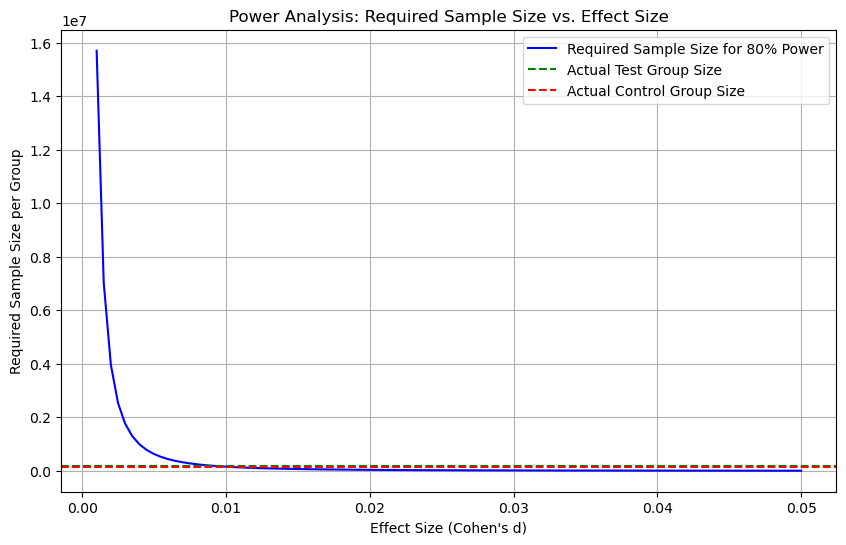

In [9]:
# Define a range of effect sizes
effect_sizes = np.linspace(0.001, 0.05, 100)

# Calculate required sample sizes for each effect size
required_sample_sizes = [smp.tt_ind_solve_power(effect_size=es, alpha=0.05, power=0.80, ratio=1) for es in effect_sizes]

# Plot the power curve
plt.figure(figsize=(10, 6))
plt.plot(effect_sizes, required_sample_sizes, label='Required Sample Size for 80% Power', color='blue')
plt.axhline(y=176641, color='green', linestyle='--', label='Actual Test Group Size')
plt.axhline(y=140482, color='red', linestyle='--', label='Actual Control Group Size')
plt.xlabel('Effect Size (Cohen\'s d)')
plt.ylabel('Required Sample Size per Group')
plt.title('Power Analysis: Required Sample Size vs. Effect Size')
plt.legend()
plt.grid(True)
plt.show()

#### Conclusion:

1.	Control Group Slightly Underpowered:

•	The Control group has fewer participants than the required sample size for 80% power. While it is not drastically underpowered, it might affect the reliability of detecting the small effect size.
•	To improve the power of the study, consider increasing the sample size of the Control group in future experiments.

2.	Effect Size Consideration:

•	The observed effect size (0.0102) is very small. Detecting such small effects requires large sample sizes, as seen in your study.
•	Consider whether such a small effect size is practically significant for your application. Sometimes, small effect sizes might not translate to meaningful changes in a real-world context.

3.	Re-evaluate Power and Sample Size Requirements:

•	Given the slight shortfall in the Control group, re-evaluate the power analysis to determine if the difference in sample sizes could materially affect the study’s conclusions.
•	Consider performing sensitivity analyses to understand how the power of the study changes with different sample sizes and effect sizes.


In [6]:
import pandas as pd
import numpy as np
import statsmodels.stats.power as smp

# Assuming df_merged is your merged dataset
# Derive completion rates
df_merged['completed'] = df_merged['process_step'] == 'confirm'

# Split the data into Test and Control groups
test_group = df_merged[df_merged['variation'] == 'Test']['completed']
control_group = df_merged[df_merged['variation'] == 'Control']['completed']

# Calculate the means and standard deviations
mean_test = np.mean(test_group)
mean_control = np.mean(control_group)
std_test = np.std(test_group, ddof=1)
std_control = np.std(control_group, ddof=1)

# Calculate pooled standard deviation
pooled_std = np.sqrt(((std_test**2 + std_control**2) / 2))

# Calculate Cohen's d
effect_size = (mean_test - mean_control) / pooled_std
print(f"Effect Size (Cohen's d): {effect_size:.4f}")

# Define the parameters for the power analysis
alpha = 0.05       # Significance level
power = 0.80       # Desired power
ratio = 176641 / 140482         # Ratio of sample sizes (Test group to Control group)

# Calculate the required sample size
sample_size = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
print(f"Required sample size per group: {sample_size:.2f}")

# Compare with the actual sample sizes
actual_sample_size_test = len(test_group)
actual_sample_size_control = len(control_group)
print(f"Actual sample size (Test group): {actual_sample_size_test}")
print(f"Actual sample size (Control group): {actual_sample_size_control}")

Effect Size (Cohen's d): 0.0632
Required sample size per group: 3524.77
Actual sample size (Test group): 176641
Actual sample size (Control group): 140482


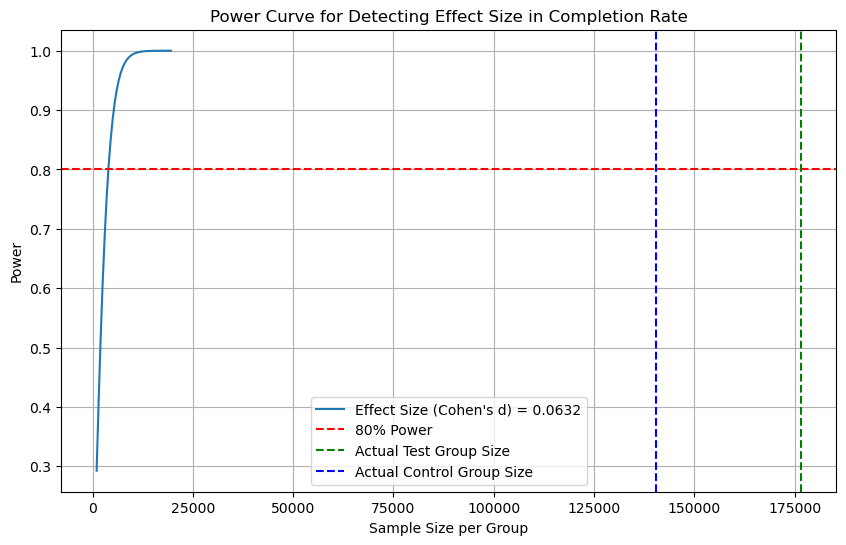

In [7]:
# Observed effect size
effect_size = 0.0632

# Define the parameters for the power analysis
alpha = 0.05  # Significance level
ratio = 1  # Ratio of sample sizes (Test group to Control group)

# Calculate power for a range of sample sizes
sample_sizes = np.arange(1000, 20000, 500)
powers = [smp.tt_ind_solve_power(effect_size=effect_size, nobs1=n, alpha=alpha, ratio=ratio, alternative='two-sided') for n in sample_sizes]

# Plot required sample size curve
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, powers, label=f'Effect Size (Cohen\'s d) = {effect_size:.4f}')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Power')
plt.axvline(x=actual_sample_size_test, color='g', linestyle='--', label='Actual Test Group Size')
plt.axvline(x=actual_sample_size_control, color='b', linestyle='--', label='Actual Control Group Size')
plt.xlabel('Sample Size per Group')
plt.ylabel('Power')
plt.title('Power Curve for Detecting Effect Size in Completion Rate')
plt.legend()
plt.grid(True)
plt.show()

### Conclusion:

- High Confidence: Given that both sample sizes are well above the threshold required for 80% power, you can be very confident in the reliability of your results.
- Low Risk of Type II Error: The risk of a Type II error (failing to detect a true effect) is very low with your sample sizes, as indicated by the high power.
- Study Design: The study is well-designed in terms of sample size, ensuring that even small effects can be detected with high confidence.
